In [364]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import random
import pywt 
from pywt._doc_utils import draw_2d_wp_basis



In [365]:
img = cv2.imread("/Users/samik/Desktop/Programming/Robot Vision Lab/eclipseHD.jpg",0)
print("Printing the dimensions of the image first: ")
height,width=img.shape[:2]
print("The height of the image is: ",height)
print("The width of the image is: ",width)

Printing the dimensions of the image first: 
The height of the image is:  1080
The width of the image is:  1920


In [366]:
noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1
img2 = img+noise


In [367]:
'''
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8) 
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):    
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j] 
    return output

img2= sp_noise(img,0.05)
plt.imshow(img2,cmap="gray")
'''


'\ndef sp_noise(image,prob):\n    output = np.zeros(image.shape,np.uint8) \n    thres = 1 - prob\n    for i in range(image.shape[0]):\n        for j in range(image.shape[1]):    \n            rdn = random.random()\n            if rdn < prob:\n                output[i][j] = 0\n            elif rdn > thres:\n                output[i][j] = 255\n            else:\n                output[i][j] = image[i][j] \n    return output\n\nimg2= sp_noise(img,0.05)\nplt.imshow(img2,cmap="gray")\n'

Text(0.5, 1.0, 'Noisy Image')

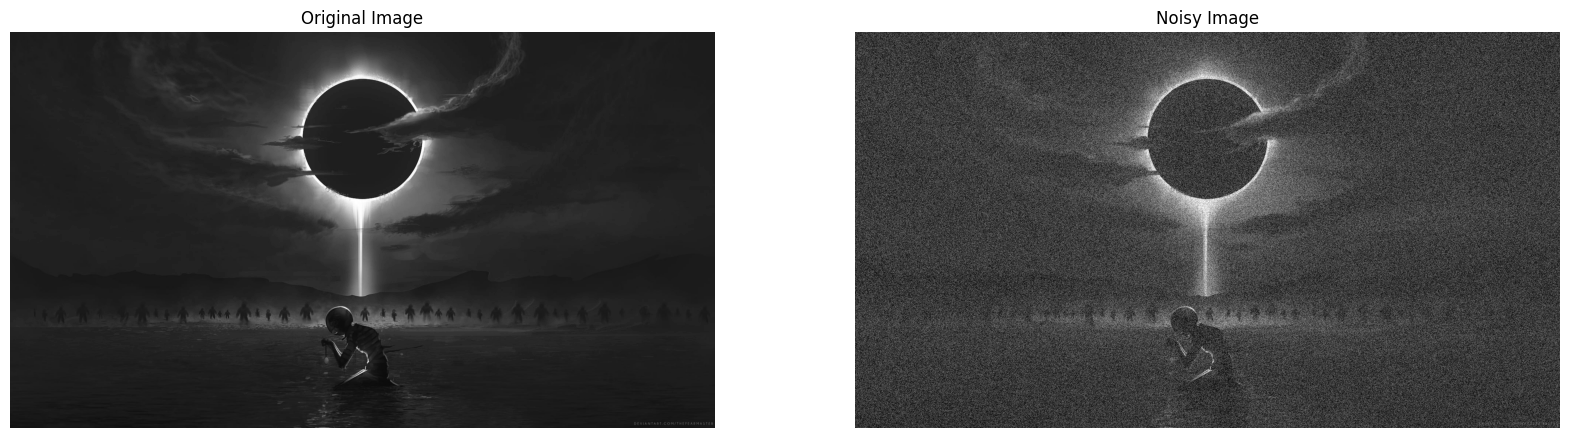

In [368]:
rows =1
columns =2
fig = plt.figure(figsize =(20,15))
fig.add_subplot(rows,columns,1)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
fig.add_subplot(rows,columns,2)
plt.imshow(img2,cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

In [369]:
cv2.imwrite("img2.jpg",img2)

True

In [370]:
def decomposition(levels,img):
    wavelet_img=pywt.wavedec2(img, wavelet='db6', mode='periodization', level=levels)
    approx_coef = wavelet_img[0]
    (horizontal_detail0, vertical_detail0 , diagonal_detail0)= wavelet_img[-1]
    (horizontal_detail,vertical_detail,diagonal_detail)=wavelet_img[-2]
    rows =2
    columns =2
    fig = plt.figure(figsize =(20,15))
    fig.add_subplot(rows,columns,1)
    fig.tight_layout()
    plt.imshow(approx_coef,cmap="gray")
    plt.axis('off')
    plt.title("Approximation Coefficient")
    fig.add_subplot(rows,columns,2)
    fig.tight_layout()
    plt.imshow(horizontal_detail,cmap="gray")
    plt.axis('off')
    plt.title("Horizontal Detail Coefficient")
    fig.add_subplot(rows,columns,3)
    fig.tight_layout()
    plt.imshow(vertical_detail,cmap="gray")
    plt.axis('off')
    plt.title("Vertical Detail Coefficient")
    fig.add_subplot(rows,columns,4)
    fig.tight_layout()
    plt.imshow(diagonal_detail,cmap="gray")
    plt.axis('off')
    plt.title("Diagonal Detail Coefficient")
    return wavelet_img

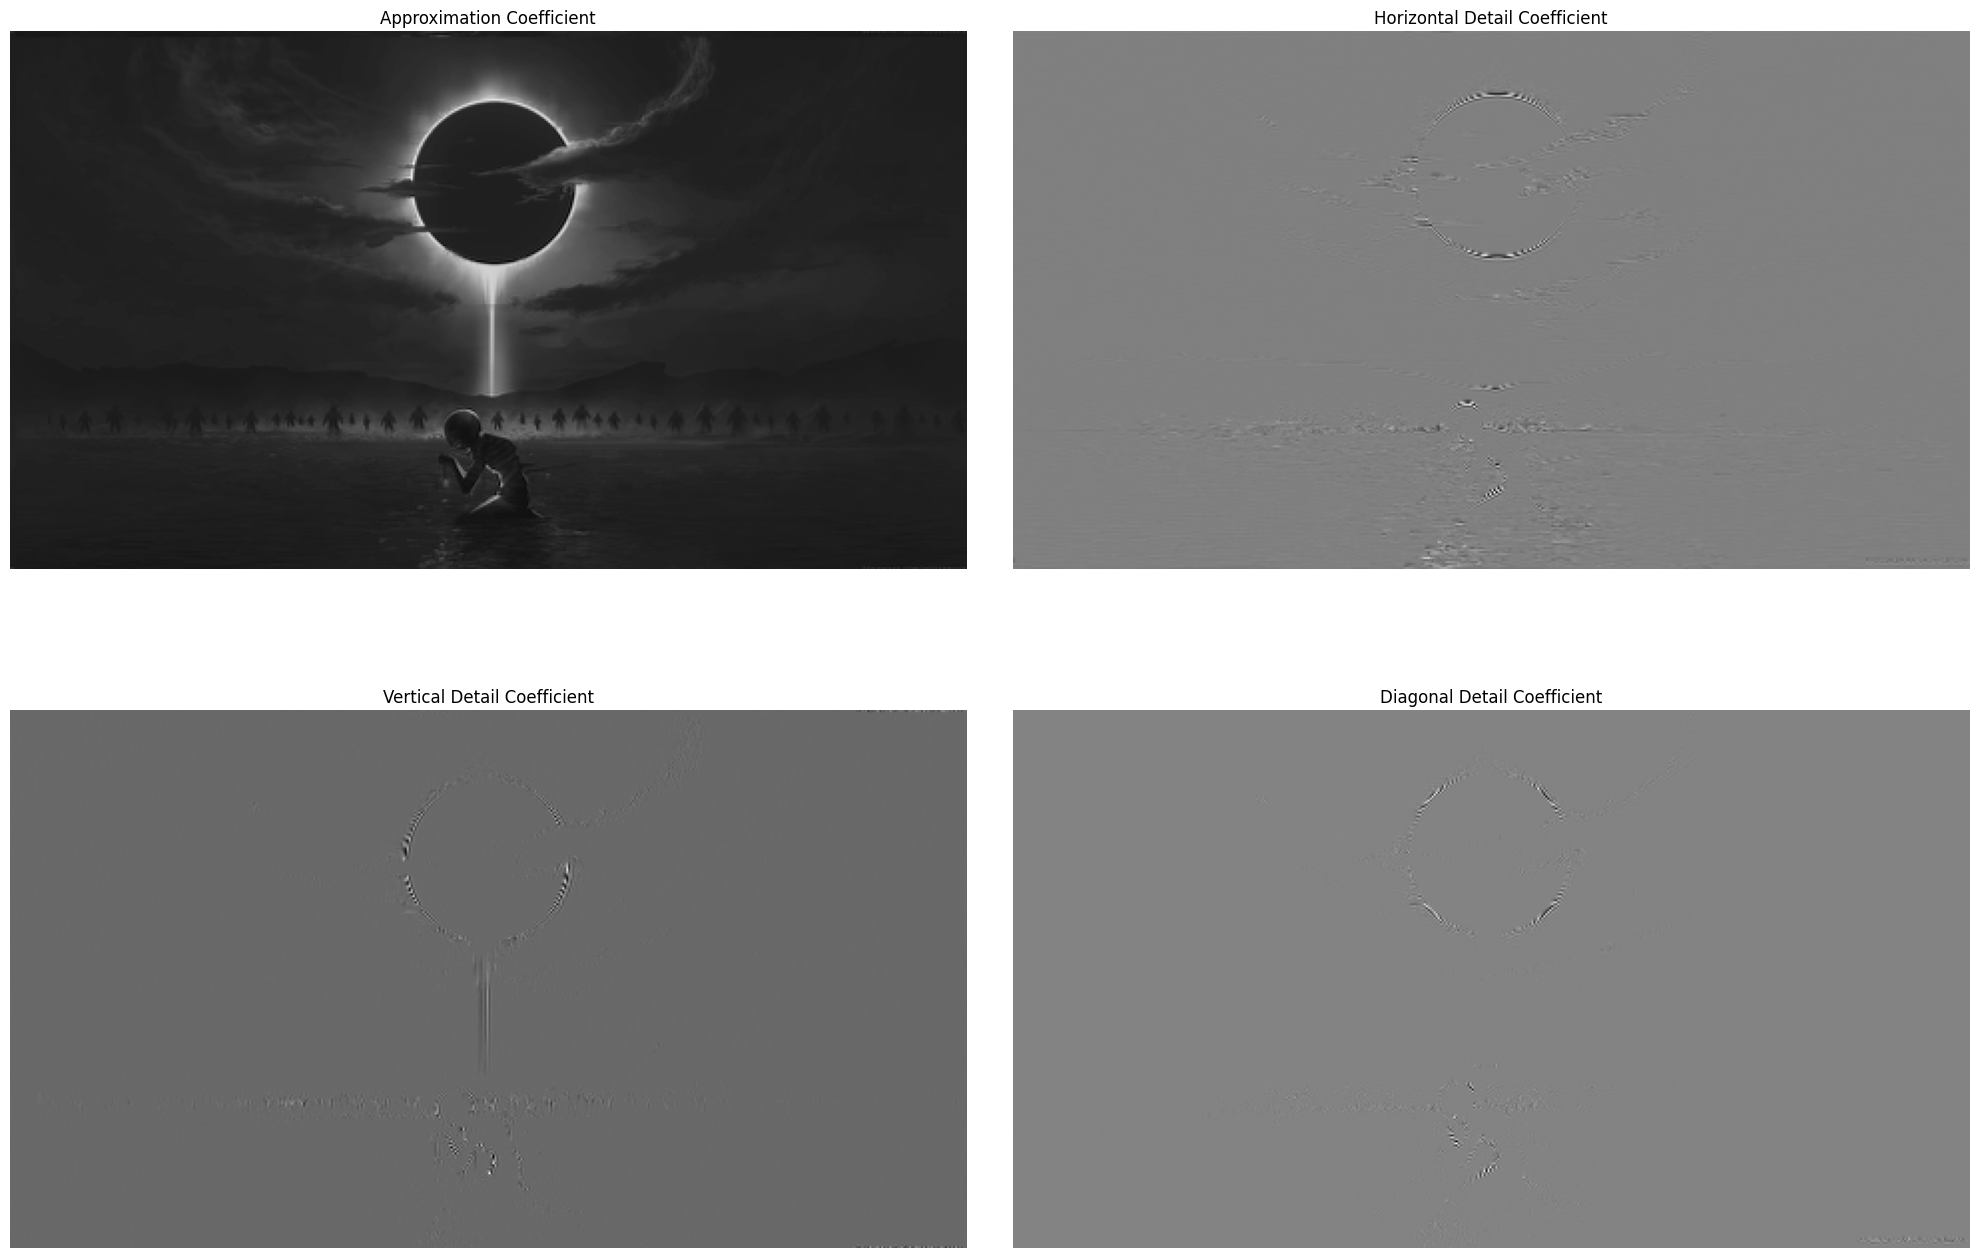

In [371]:
wavelet_img=decomposition(2,img)

In [372]:
def all_decomposed(wavelet_img):
    arr, slices = pywt.coeffs_to_array(wavelet_img)
    plt.imshow(arr, cmap=plt.cm.gray)

In [373]:
def reconstruction(wavelet_img):
    reconstructed_img = pywt.waverec2(wavelet_img, 'db6', mode='periodization')
    reconstructed_img=np.uint8(reconstructed_img)
    plt.imshow(reconstructed_img,cmap="gray")
    plt.title("Reconstructed image")
    return reconstructed_img
    

True

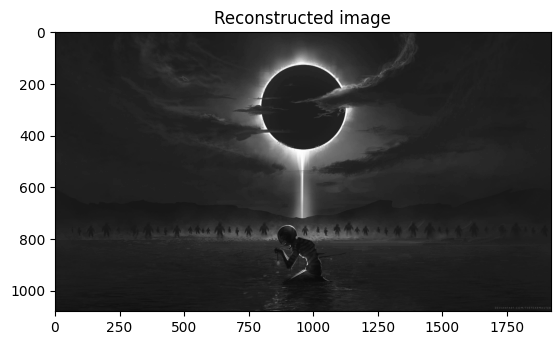

In [374]:
reconstructed_img1=reconstruction(wavelet_img)
cv2.imwrite("O1.jpg",reconstructed_img1)
    

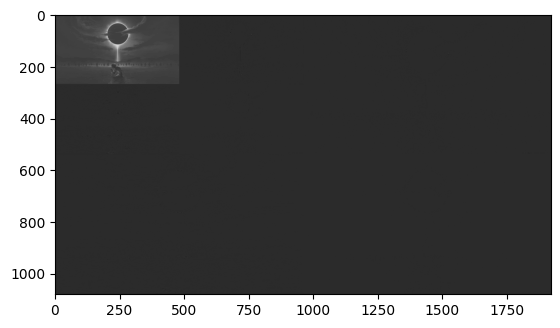

In [375]:
all_decomposed(wavelet_img)

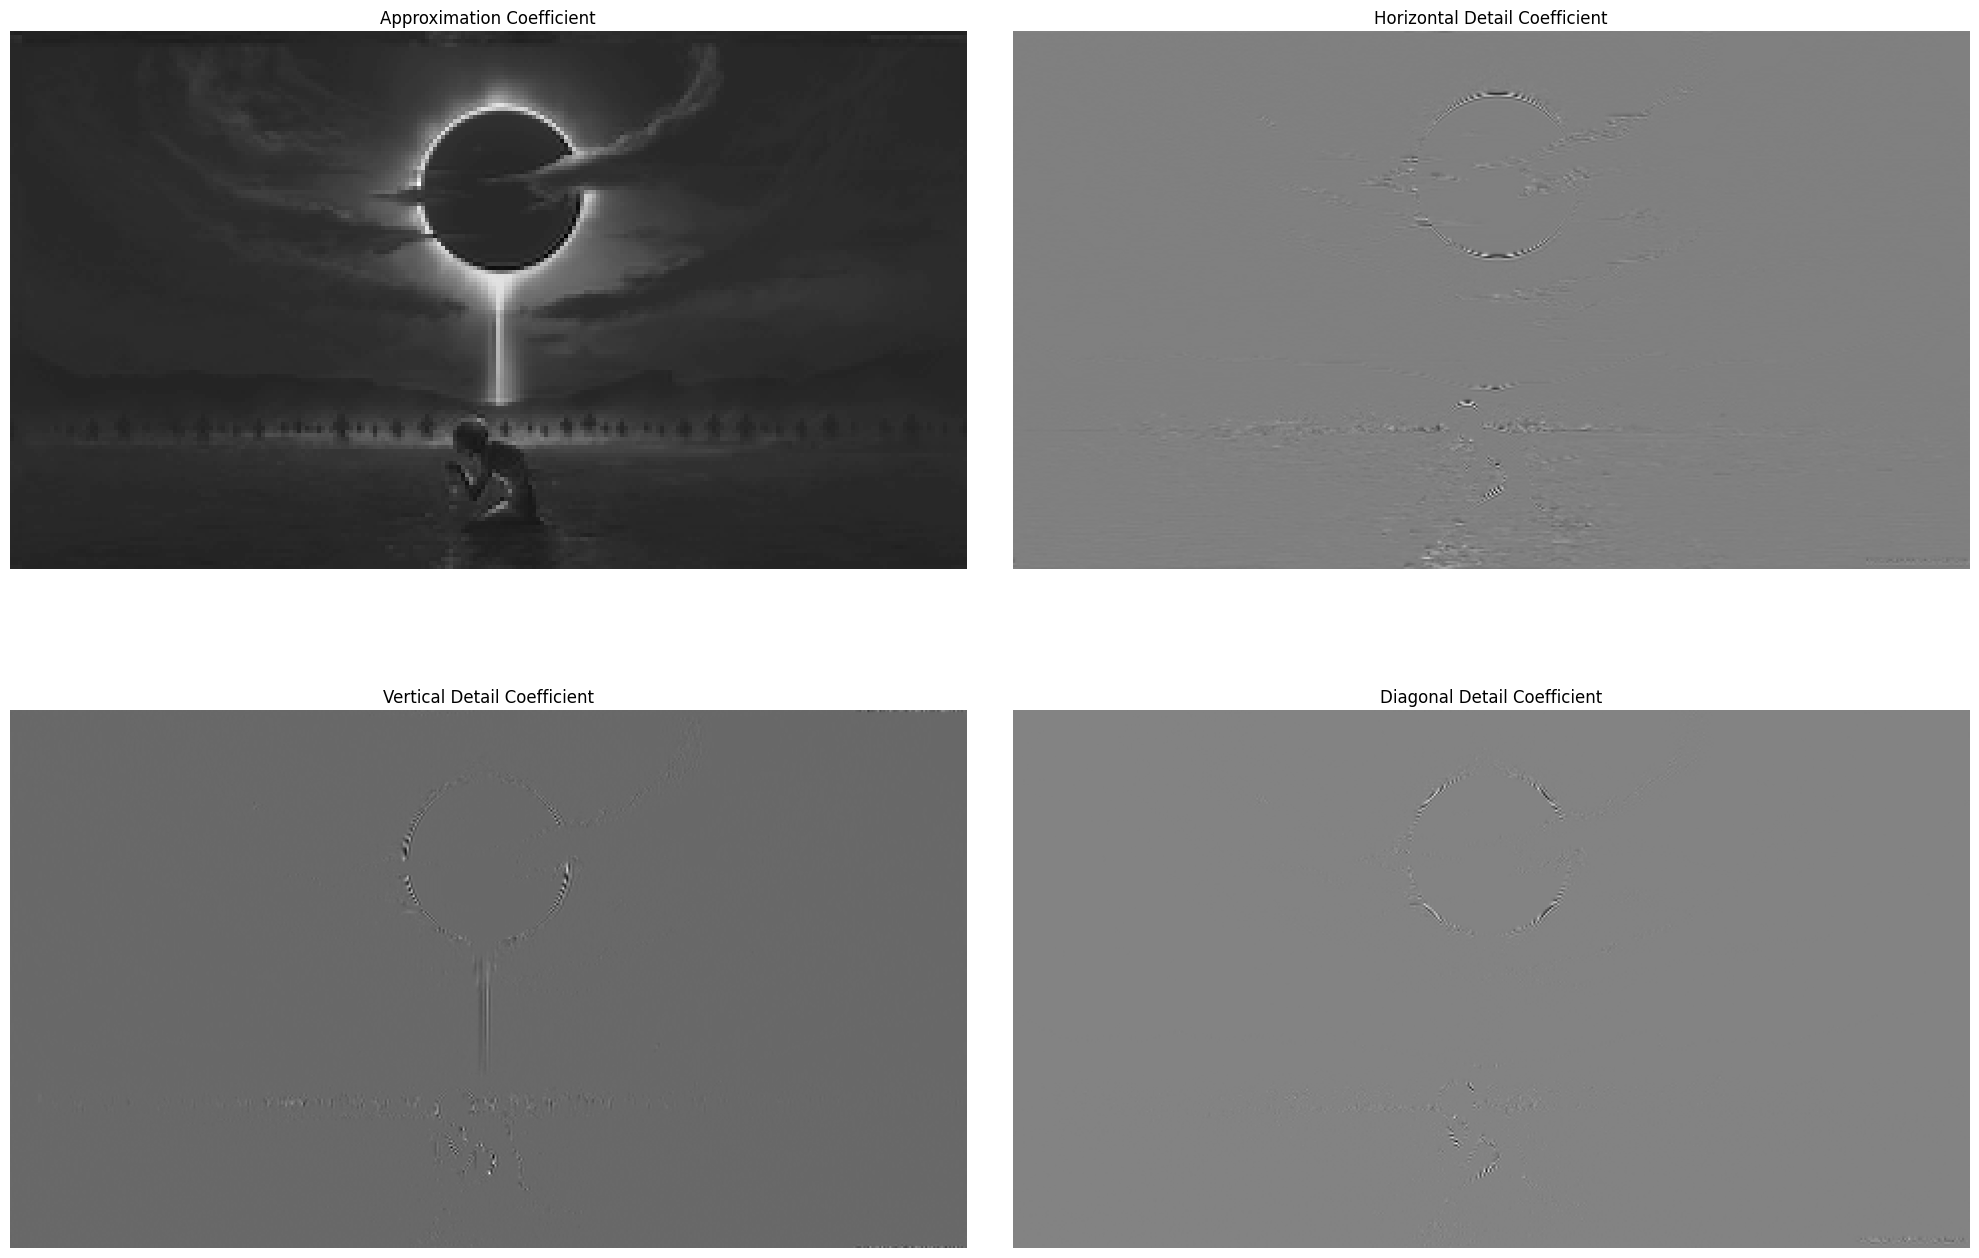

In [376]:
#for level 3
wavelet_img = decomposition(levels=3,img=img)

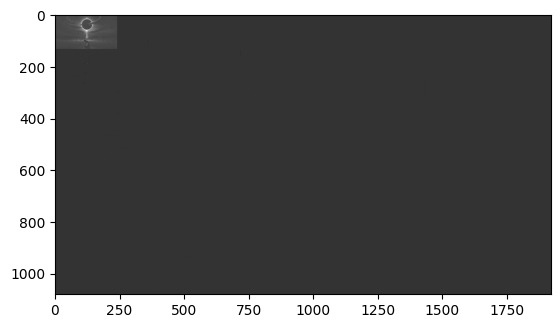

In [377]:
#for level 3
all_decomposed(wavelet_img)

True

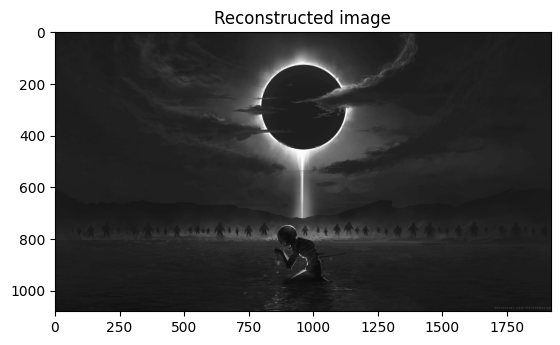

In [378]:
#for level 3
reconstructed_img3=reconstruction(wavelet_img)
cv2.imwrite("level3_reconstructed.jpg",reconstructed_img3)

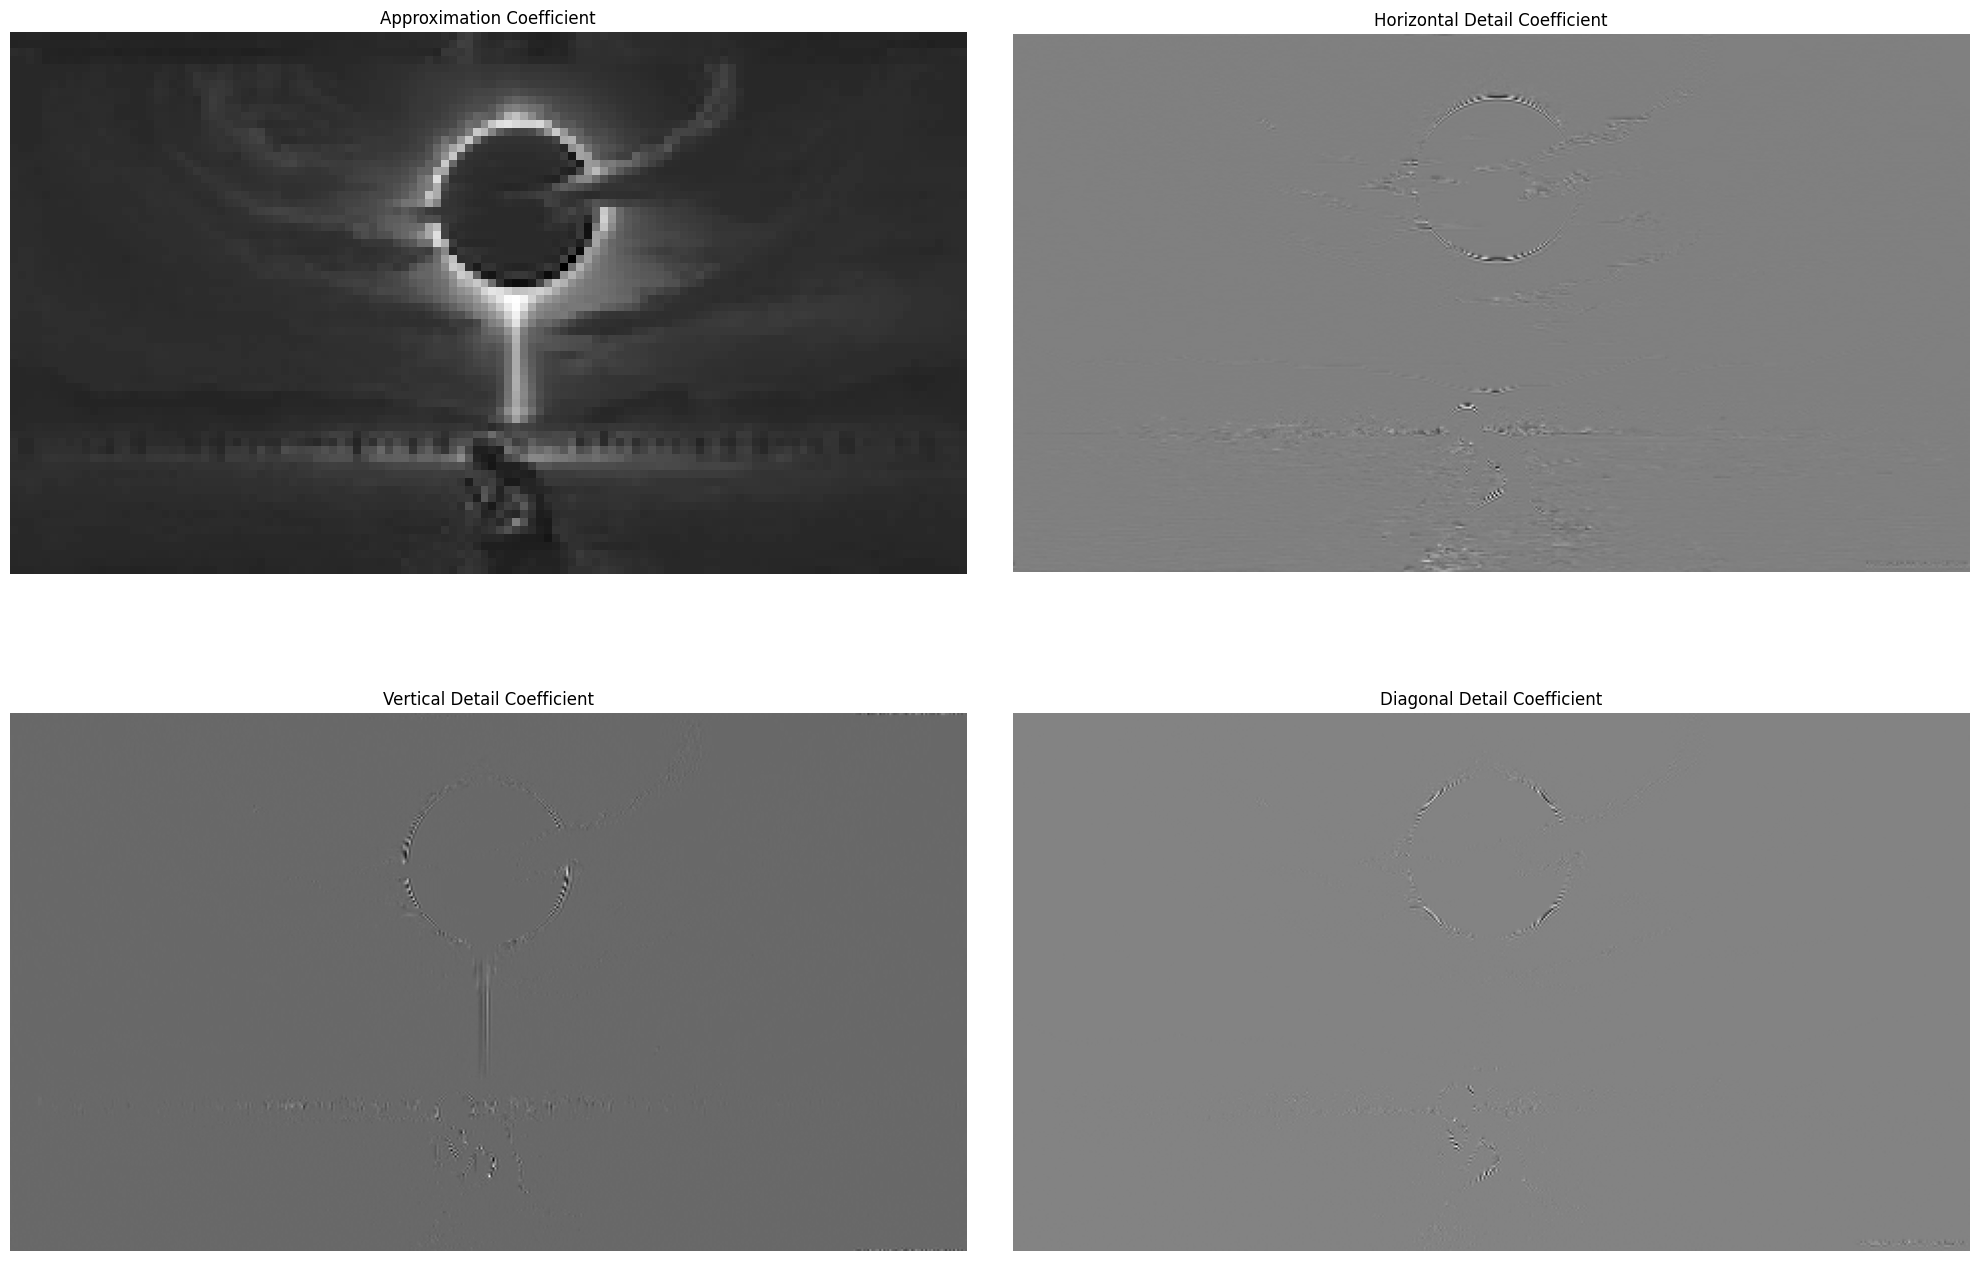

In [379]:
#for level 4
wavelet_img= decomposition(4,img)


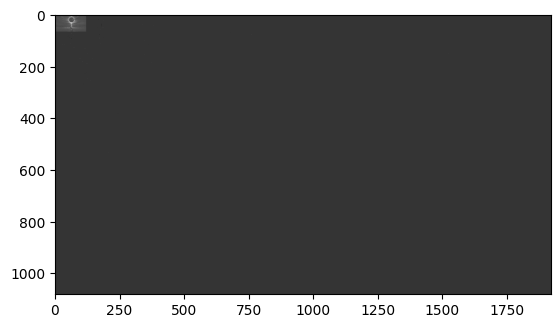

In [380]:
#for level 4
all_decomposed(wavelet_img)

True

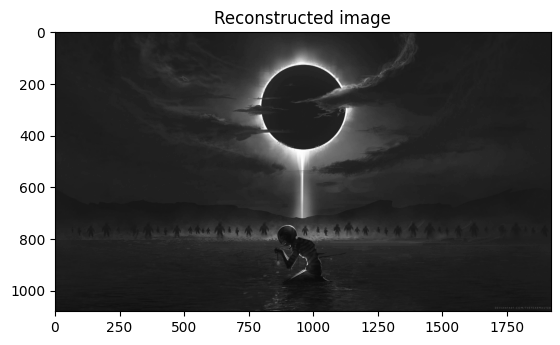

In [381]:
#for level 4
reconstructed_img4=reconstruction(wavelet_img)
cv2.imwrite("level4_reconstructed.jpg",reconstructed_img4)

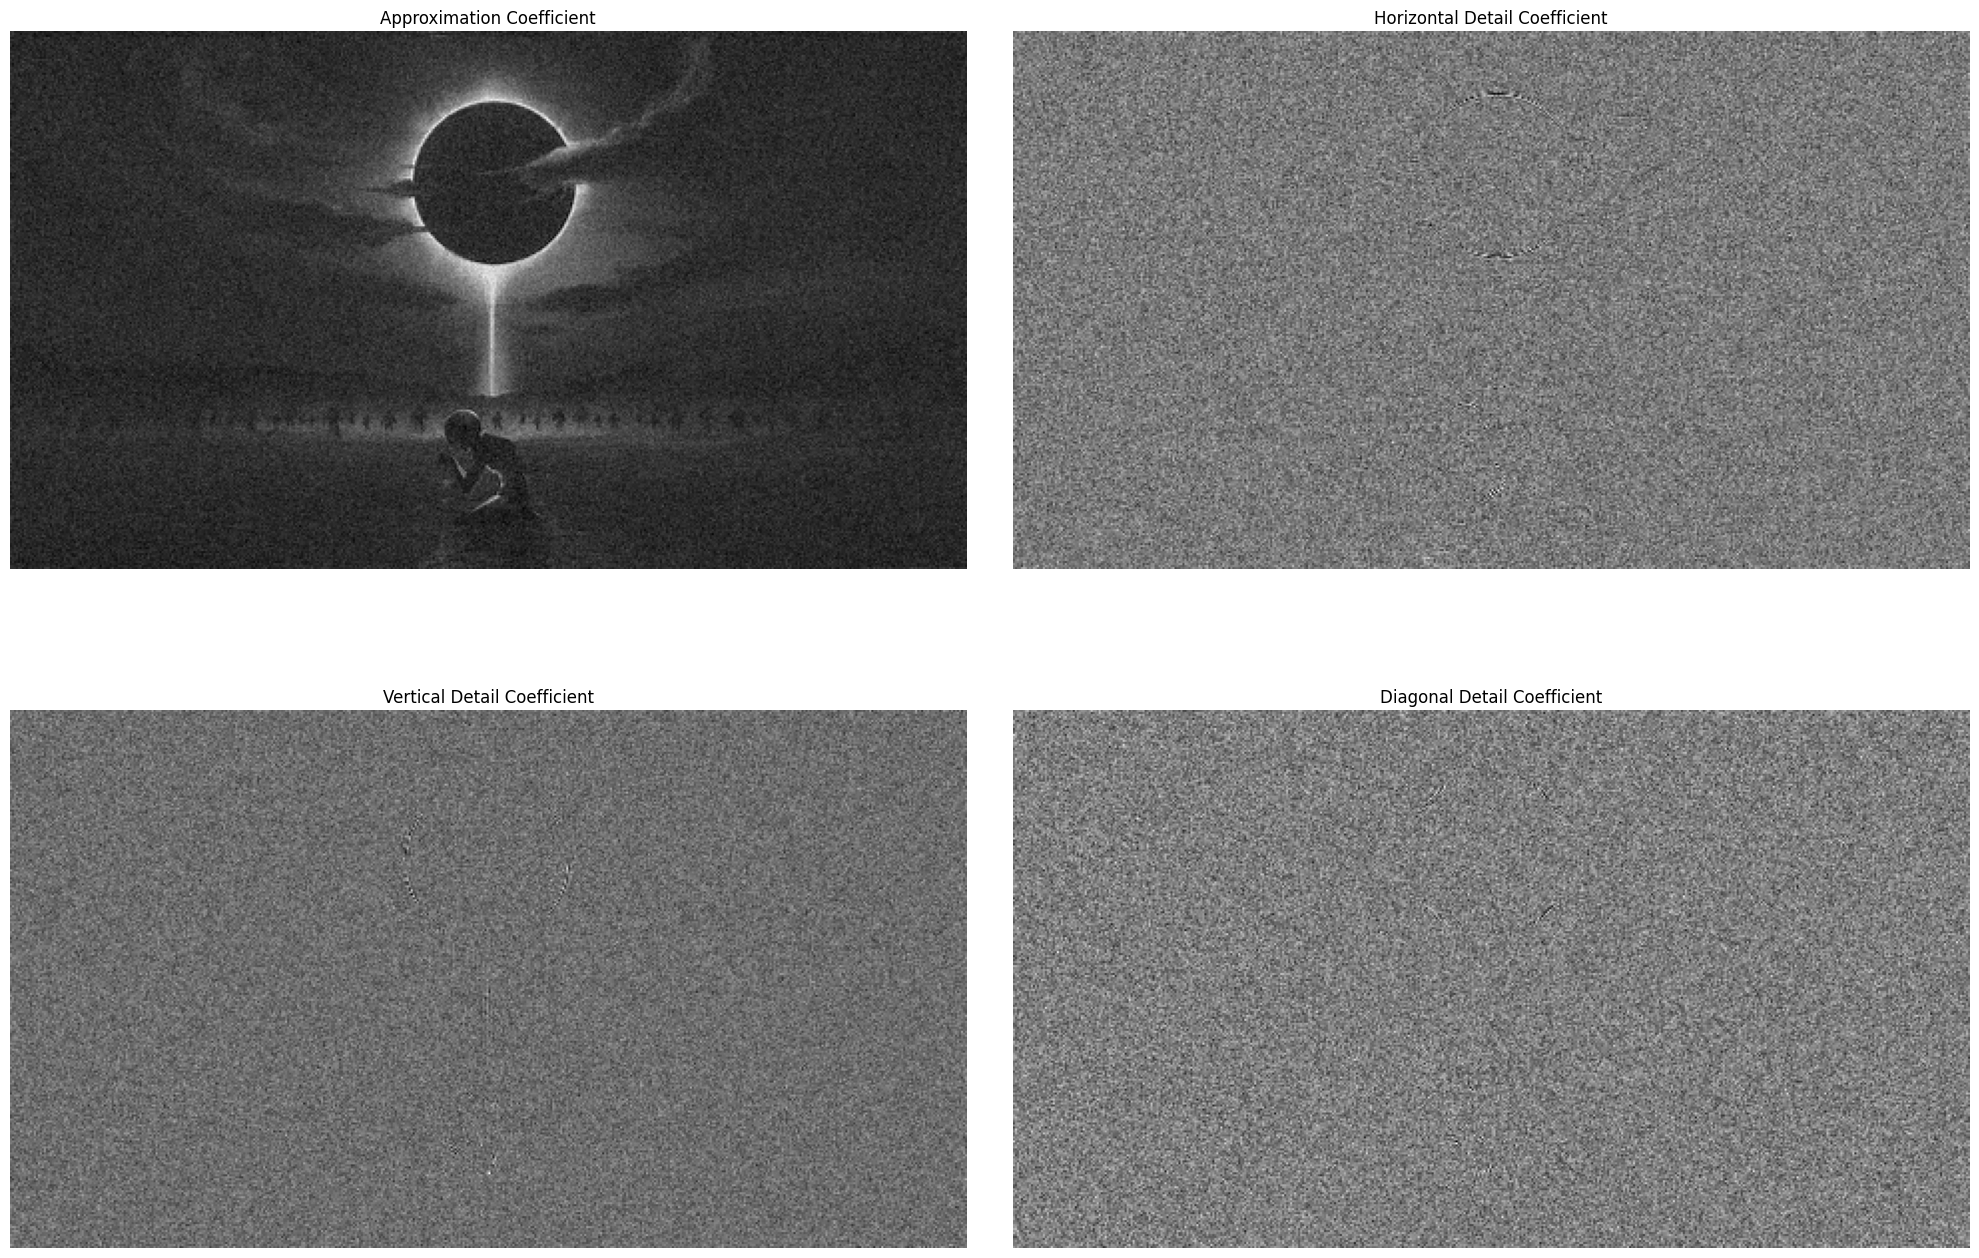

In [382]:
#now passing the noise image 
wavelet_img2=decomposition(2,img2)


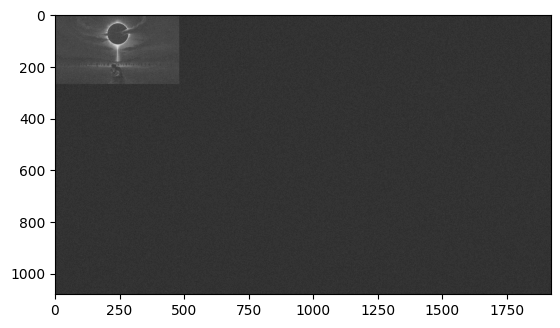

In [383]:
all_decomposed(wavelet_img2)

Text(0.5, 1.0, 'Reconstructed noisy image')

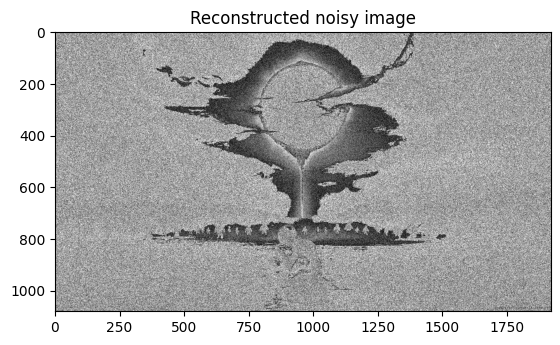

In [384]:
wavelet_img=pywt.wavedec2(img2, wavelet='db6', mode='periodization', level=2)
approx_coef = wavelet_img[0]
(horizontal_detail0, vertical_detail0 , diagonal_detail0)= wavelet_img[-1]
(horizontal_detail,vertical_detail,diagonal_detail)=wavelet_img[-2]
reconstructed_img2 = pywt.waverec2(wavelet_img, 'db6', mode='periodization')
reconstructed_img2=np.uint8(reconstructed_img2)
plt.imshow(reconstructed_img2,cmap="gray")
plt.title("Reconstructed noisy image")

In [386]:
cv2.imwrite("O2.jpg",reconstructed_img2)

True

In [387]:
ssim_O2 = ssim(img2, reconstructed_img2,data_range=reconstructed_img2.max() - reconstructed_img2.min()) 
print("The image metric SSIM for comparing the noisy original image(img2) and the reconstructed image(O2) with noise at level 2 is: ",ssim_O2)


The image metric SSIM for comparing the noisy original image(img2) and the reconstructed image(O2) with noise at level 2 is:  -0.2070399975040541


In [385]:
#now checking the metrics 
ssim_O1 = ssim(img, reconstructed_img1,data_range=reconstructed_img1.max() - reconstructed_img1.min()) 
ssim_O2 = ssim(img2, reconstructed_img2,data_range=reconstructed_img2.max() - reconstructed_img2.min()) 
print("The image metric SSIM for comparing the original image and the reconstructed image at level 2 is: ",ssim_O1)
ssim_O3 =ssim(img,reconstructed_img3,data_range=reconstructed_img3.max()-reconstructed_img3.min())
ssim_O4 = ssim(img, reconstructed_img4,data_range = reconstructed_img4.max()-reconstructed_img4.min() )
ssim_O2_noisy = ssim(img, reconstructed_img2,data_range=reconstructed_img2.max() - reconstructed_img2.min())
print("The image metric SSIM for comparing the noisy original image(img2) and the reconstructed image(O2) with noise at level 2 is: ",ssim_O2)

print("The image metric SSIM for comparing the original image and the reconstructed image with noise at level 2 is: ",ssim_O2_noisy)
print("The image metric SSIM for comparing the original image and the reconstructed image with noise at level 3 is: ",ssim_O3)

print("The image metric SSIM for comparing the original image and the reconstructed image  at level 4 is: ",ssim_O4)


The image metric SSIM for comparing the original image and the reconstructed image at level 2 is:  0.9964575472691516
The image metric SSIM for comparing the noisy original image(img2) and the reconstructed image(O2) with noise at level 2 is:  -0.2070399975040541
The image metric SSIM for comparing the original image and the reconstructed image with noise at level 2 is:  0.004884344425000857
The image metric SSIM for comparing the original image and the reconstructed image with noise at level 3 is:  0.9967989931146338
The image metric SSIM for comparing the original image and the reconstructed image  at level 4 is:  0.9972303254464373
